In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv(r"C:\Users\dhana\Downloads\sales_dataset.csv")

# Create a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

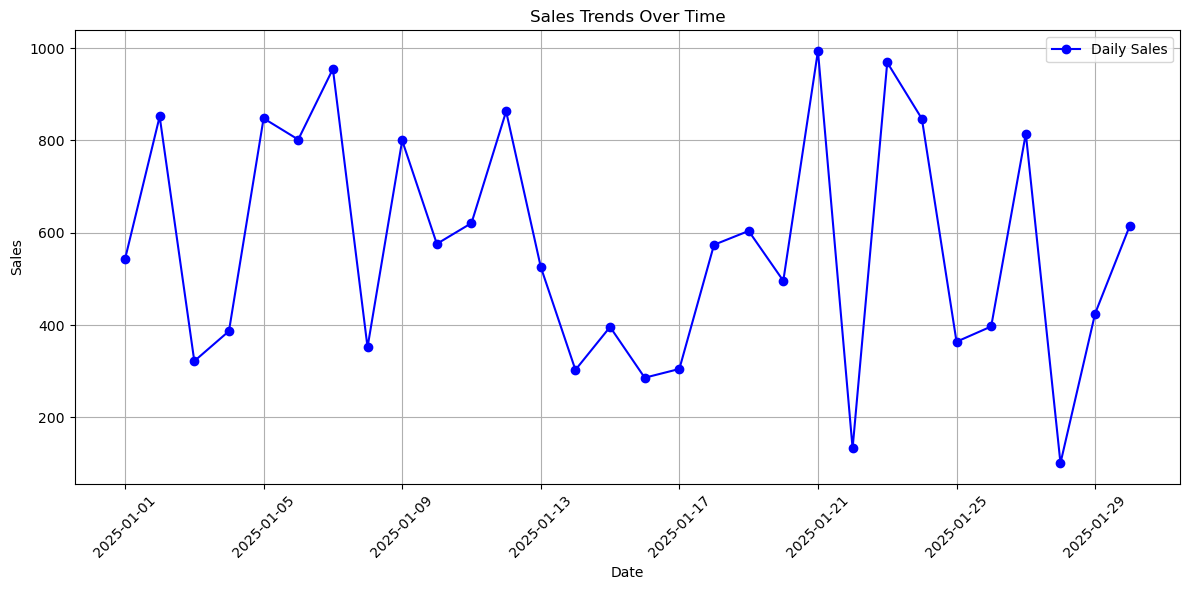

In [6]:
# Plotting the Sales Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Daily Sales', color='blue', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


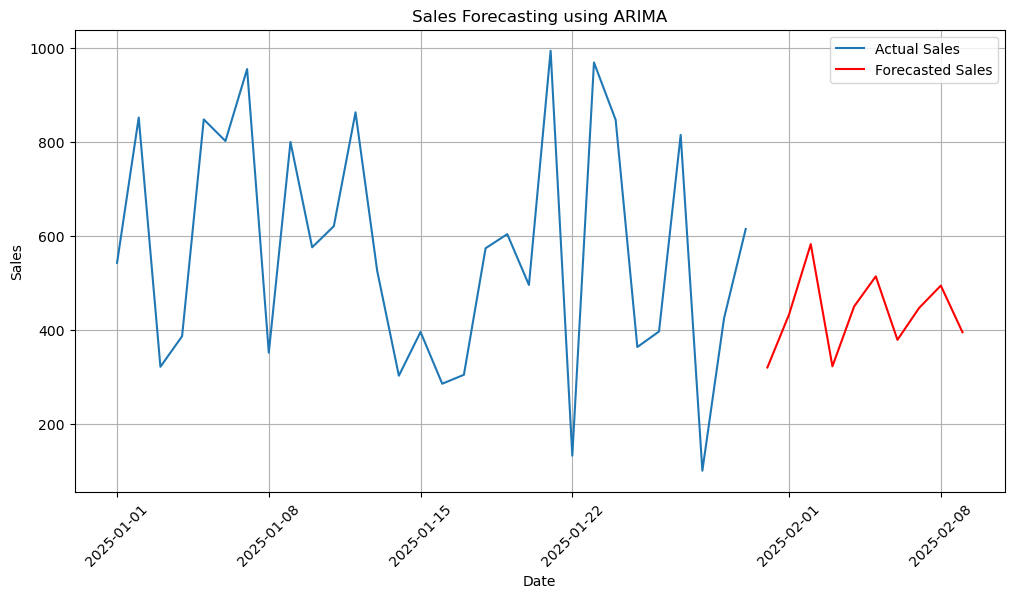

In [10]:
# Fit ARIMA Model
model = ARIMA(df['Sales'], order=(5, 1, 0)) 
model_fit = model.fit()

# Forecasting
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot Forecasting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, forecast_steps+1)]
plt.plot(future_dates, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Model Evaluation
predicted = model_fit.predict(start=0, end=len(df)-1)
rmse = np.sqrt(mean_squared_error(df['Sales'], predicted))
print(f'RMSE: {rmse:.2f}')

RMSE: 281.29


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\dhana\Downloads\heart_disease.csv")

# Check for missing or inconsistent data
print('Dataset Information:')
df.info()

# Check for duplicates and remove them
print(f'Duplicates Found: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

# Handling null values
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)

# Feature Engineering: Encoding Gender and Target Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Splitting Blood Pressure into Systolic and Diastolic
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(bp_split[0])
df['Diastolic'] = pd.to_numeric(bp_split[1])
df.drop(['Blood Pressure'], axis=1, inplace=True)

# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Cholesterol', 'Systolic', 'Diastolic']] = scaler.fit_transform(df[['Age', 'Cholesterol', 'Systolic', 'Diastolic']])

# Preparing data for model training
X = df.drop(['Heart Disease'], axis=1)
y = le.fit_transform(df['Heart Disease'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             100 non-null    int64 
 1   Gender          100 non-null    object
 2   Cholesterol     100 non-null    int64 
 3   Blood Pressure  100 non-null    object
 4   Heart Disease   100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB
Duplicates Found: 0
Confusion Matrix:
[[ 0 11]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.45      1.00      0.62         9

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
